In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [5]:
House= pd.read_csv('Housing.csv')

In [6]:
print(House.to_string())

        price   area  bedrooms  bathrooms  stories mainroad guestroom basement hotwaterheating airconditioning  parking prefarea furnishingstatus
0    13300000   7420         4          2        3      yes        no       no              no             yes        2      yes        furnished
1    12250000   8960         4          4        4      yes        no       no              no             yes        3       no        furnished
2    12250000   9960         3          2        2      yes        no      yes              no              no        2      yes   semi-furnished
3    12215000   7500         4          2        2      yes        no      yes              no             yes        3      yes        furnished
4    11410000   7420         4          1        2      yes       yes      yes              no             yes        2       no        furnished
5    10850000   7500         3          3        1      yes        no      yes              no             yes        2     

In [7]:
House.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


C:\Users\ayomide.ajala\AppData\Local\Temp\ipykernel_19728\3531360092.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  House.corr()
C:\Users\ayomide.ajala\AppData\Local\Temp\ipykernel_19728\3531360092.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(House.corr().round(2))


<Axes: >

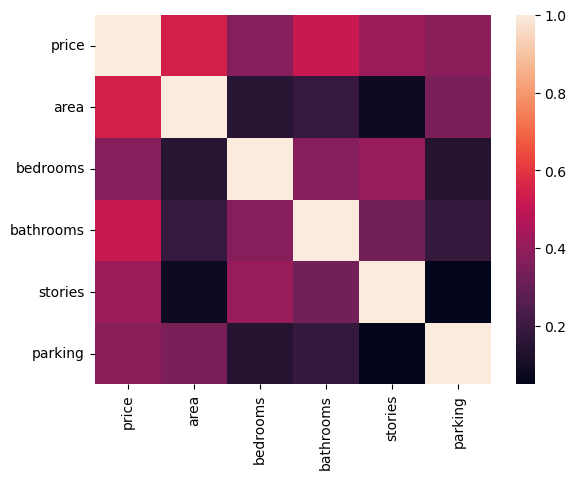

In [8]:
House.corr()
sns.heatmap(House.corr().round(2))

In [9]:
#Checking for all the oytliers in each column

<Axes: >

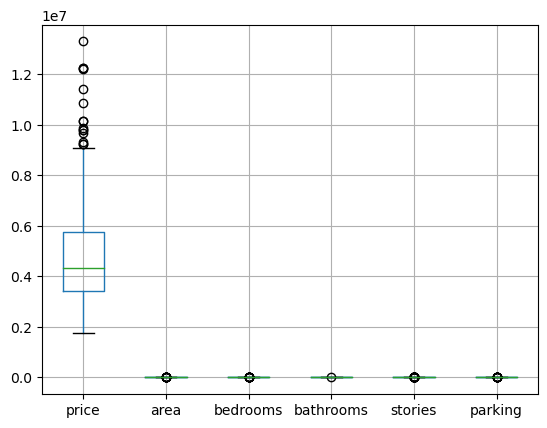

In [10]:
House.boxplot()

<Axes: ylabel='price'>

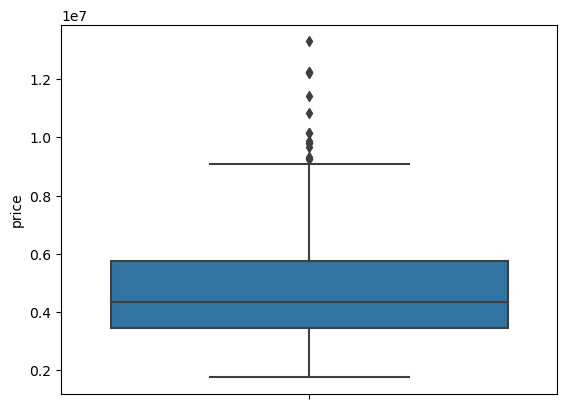

In [11]:
sns.boxplot(y='price', data=House)

In [12]:
#Label encoding for column with words

In [13]:
h2=pd.get_dummies(House, drop_first=True)

In [14]:
h2.head()

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,1,0,0,0,1,1,0,0
1,12250000,8960,4,4,4,3,1,0,0,0,1,0,0,0
2,12250000,9960,3,2,2,2,1,0,1,0,0,1,1,0
3,12215000,7500,4,2,2,3,1,0,1,0,1,1,0,0
4,11410000,7420,4,1,2,2,1,1,1,0,1,0,0,0


In [15]:
h2.shape

(545, 14)

In [16]:
x= h2.drop('price', axis=1)
y=h2['price']

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size =0.2, random_state=0)

In [22]:
scaler=MinMaxScaler()

In [23]:
#Transforming independent variable using MInMaxScaler
x_train= scaler.fit_transform(x_train)
x_test= scaler.transform(x_test)

In [24]:
#Display transformed independent data
x_train

array([[0.12419939, 0.2       , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.15065441, 0.2       , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.08382066, 0.2       , 0.        , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.27248677, 0.4       , 0.5       , ..., 1.        , 0.        ,
        1.        ],
       [0.12280702, 0.4       , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.33166249, 0.4       , 0.        , ..., 1.        , 0.        ,
        0.        ]])

In [25]:
#Fitting the multi linear regression to the training set
regressor= LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [27]:
#Predicting the test score
y_pred= regressor.predict(x_test)

In [28]:
r2_score(y_test, y_pred)

0.6611214250980102

In [30]:
#Finding the root mean square error and calculating the square root to get the exact score
math.sqrt(mean_squared_error(y_test, y_pred))

988172.4399236256

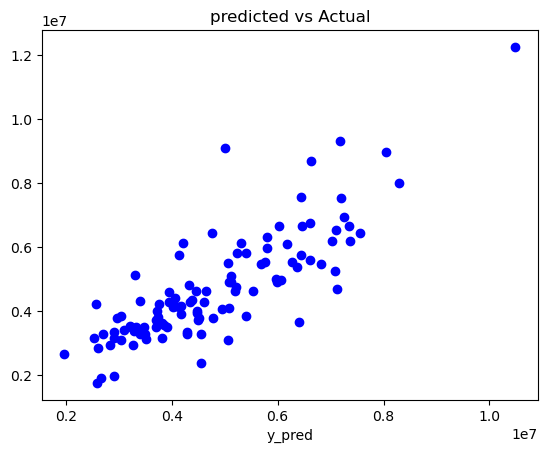

In [31]:
#Residual plot for the model just built
plt.scatter(y_pred, y_test, color='blue')
plt.title('predicted vs Actual')
plt.xlabel('y_pred')
plt.show()